# STA 141B: Homework 1
Winter 2018

## Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Wei-Kuang

Last Name: Lin 

Student ID: 997062562

## Part 1: The Doomsday Algorithm

The Doomsday algorithm, devised by mathematician J. H. Conway, computes the day of the week any given date fell on. The algorithm is designed to be simple enough to memorize and use for mental calculation.

__Example.__ With the algorithm, we can compute that July 4, 1776 (the day the United States declared independence from Great Britain) was a Thursday.

The algorithm is based on the fact that for any year, several dates always fall on the same day of the week, called the <em style="color:#F00">doomsday</em> for the year. These dates include 4/4, 6/6, 8/8, 10/10, and 12/12.

__Example.__ The doomsday for 2016 is Monday, so in 2016 the dates above all fell on Mondays. The doomsday for 2017 is Tuesday, so in 2017 the dates above will all fall on Tuesdays.

The doomsday algorithm has three major steps:

1. Compute the anchor day for the target century.
2. Compute the doomsday for the target year based on the anchor day.
3. Determine the day of week for the target date by counting the number of days to the nearest doomsday.

Each step is explained in detail below.

### The Anchor Day

The doomsday for the first year in a century is called the <em style="color:#F00">anchor day</em> for that century. The anchor day is needed to compute the doomsday for any other year in that century. The anchor day for a century $c$ can be computed with the formula:
$$
a = \bigl( 5 (c \bmod 4) + 2 \bigr) \bmod 7
$$
The result $a$ corresponds to a day of the week, starting with $0$ for Sunday and ending with $6$ for Saturday.

__Note.__ The modulo operation $(x \bmod y)$ finds the remainder after dividing $x$ by $y$. For instance, $12 \bmod 3 = 0$ since the remainder after dividing $12$ by $3$ is $0$. Similarly, $11 \bmod 7 = 4$, since the remainder after dividing $11$ by $7$ is $4$.

__Example.__ Suppose the target year is 1954, so the century is $c = 19$. Plugging this into the formula gives
$$a = \bigl( 5 (19 \bmod 4) + 2 \bigr) \bmod 7 = \bigl( 5(3) + 2 \bigr) \bmod 7 = 3.$$
In other words, the anchor day for 1900-1999 is Wednesday, which is also the doomsday for 1900.

__Exercise 1.1.__ Write a function that accepts a year as input and computes the anchor day for that year's century. The modulo operator `%` and functions in the `math` module may be useful. Document your function with a docstring and test your function for a few different years.  Do this in a new cell below this one.

In [1]:
import math  # load package "math" to use math.floor fucntion 

from datetime import datetime
import operator # find the index of max and min in a set

In [2]:
def anchor_day(year):
    """ 
    Action: Find the anchor day for the given year
    Arguemnts: year integer
    Returns: The anchor day (day of the week) for the given year. 
    The output is the integer number form 0 to 6. For example, 0 = Sunday, 1= Monday
    """
    c= math.floor(year/100) 
    a = (5*(c % 4) +2 ) % 7
    return a

##### list  of anchor days for each centries
* 1800 - 1899: Friday
* 1900 - 1999: Wednesday
* 2000 - 2099: Tuesday
* 2100 - 2199: Sunday

In [3]:
# Test
x1 = anchor_day(1801) # 5, Fri
x2 = anchor_day(1999) # 3, Wed
x3 = anchor_day(2000) # 2, Tu
x4 = anchor_day(2199) # 0, Sun
Ans = [x1,x2,x3,x4]
print(Ans)

# The anchor_day function is correct!

[5, 3, 2, 0]


### The Doomsday

Once the anchor day is known, let $y$ be the last two digits of the target year. Then the doomsday for the target year can be computed with the formula:
$$d = \left(y + \left\lfloor\frac{y}{4}\right\rfloor + a\right) \bmod 7$$
The result $d$ corresponds to a day of the week.

__Note.__ The floor operation $\lfloor x \rfloor$ rounds $x$ down to the nearest integer. For instance, $\lfloor 3.1 \rfloor = 3$ and $\lfloor 3.8 \rfloor = 3$.

__Example.__ Again suppose the target year is 1954. Then the anchor day is $a = 3$, and $y = 54$, so the formula gives
$$
d = \left(54 + \left\lfloor\frac{54}{4}\right\rfloor + 3\right) \bmod 7 = (54 + 13 + 3) \bmod 7 = 0.
$$
Thus the doomsday for 1954 is Sunday.

__Exercise 1.2.__ Write a function that accepts a year as input and computes the doomsday for that year. Your function may need to call the function you wrote in exercise 1.1. Make sure to document and test your function.

In [4]:
def doomsday(year):
    """ 
    Action:Find the doomsday for the given year
    Arguemnts: year
    Returns: The doomsday for the given year. 
    The output is the integer number form 0 to 6.  For example 0 = Sunday, 1= Monday, ..., 6= Saturday
    """
    # Compuate a, the anchor day
    c= math.floor(year/100) 
    a = (5*(c % 4) +2 ) % 7 # a is the anchor year
    
    # Compuate y, the last two digit of the year
    y= year % 100 # y is the last two digit
    
    # Compuate d, the doomsday of the given year
    d= (y+math.floor(y/4)+a)% 7
    
    return d

In [5]:
# test
x0 = doomsday(1954) # 0, Sun
x1 = doomsday(1898) # 1, Mon
x2 = doomsday(1908) # 6, Sat
x3 = doomsday(2000) # 2, Tu
x4 = doomsday(2019) # 4, Thr

Ans = [x0,x1,x2,x3,x4]
print(Ans)

# The doomsday function is correct!

[0, 1, 6, 2, 4]


### The Day of Week

The final step in the Doomsday algorithm is to count the number of days between the target date and a nearby doomsday, modulo 7. This gives the day of the week.

Every month has at least one doomsday:
* (regular years) 1/10, 2/28
* (leap years) 1/11, 2/29
* 3/21, 4/4, 5/9, 6/6, 7/11, 8/8, 9/5, 10/10, 11/7, 12/12

__Example.__ Suppose we want to find the day of the week for 7/21/1954. The doomsday for 1954 is Sunday, and a nearby doomsday is 7/11. There are 10 days in July between 7/11 and 7/21. Since $10 \bmod 7 = 3$, the date 7/21/1954 falls 3 days after a Sunday, on a Wednesday.

__Exercise 1.3.__ Write a function to determine the day of the week for a given day, month, and year. Be careful of leap years! Your function should return a string such as "Thursday" rather than a number. As usual, document and test your code.

In [6]:
def day_of_week(d, m, y):
    """ 
    Action: Find the weekday for the given date (d= day, m=month, y=year)
    Arguemnts: The inputs are d= day, m=month, Y=year
    Returns: The doomsday for the given year. The output is the 
    integer number form 0 to 6.  For example, 0 = Sunday, 1= Monday
    """
    
    # Determine whether the year is leap year or regular year
    if (y% 400 == 0) or (y%4==0 and y%100 !=0):
        leap_year_logic = True
    else:
        leap_year_logic = False
        
        
    # Based on the logic of leap_year, determine the doomsday dictionary
    if (leap_year_logic == True):
        doomsday_dict = {1:11, 2:29, 3:21, 4:4, 5:9, 6:6, 7:11, 8:8, 9:5, 10:10, 11:7, 12:12}
    else:
        doomsday_dict = {1:10, 2:28, 3:21, 4:4, 5:9, 6:6, 7:11, 8:8, 9:5, 10:10, 11:7, 12:12}
        
    
    # Compute doomsday as the baseline ( the day of the week)
    baseline = doomsday(y)
    
    # Compute difference between the day and basline, in the same month
    diff = d - doomsday_dict[m] 
    
    # Day of the week
    weekday = ["Sun", "Mon","Tue","Wed","Thr","Fri","Sat"][ (baseline + diff)%7]
    
    return weekday

In [7]:
# Test
x1 = day_of_week(d=10, m=1, y=2003)
x2 = day_of_week(d=15, m=2, y=2004)
x3 = day_of_week(d=20, m=3, y=2005)
x4 = day_of_week(d=21, m=7, y=2016)
x5 = day_of_week(d=30, m=4, y=2016)
x6 = day_of_week(d=10, m=7, y=2019)

Ans = [x1,x2,x3,x4,x5,x6]
print(Ans)

# These answeres are correct! 

['Fri', 'Sun', 'Sun', 'Thr', 'Sat', 'Wed']


__Exercise 1.4.__ How many times did Friday the 13th occur in the years 1900-1999? Does this number seem to be similar to other centuries?

In [8]:
# 18th Centry (1800-1899)
weekday_list = [day_of_week(13, m, y) for y in range(1700, 1799+1) for m in range(1, 12+1)]
logic=[x == 'Fri' for x in weekday_list]
sum(logic)

172

In [9]:
# 19th Centry (1800-1899)
weekday_list = [day_of_week(13, m, y) for y in range(1800, 1899+1) for m in range(1, 12+1)]
logic=[x == 'Fri' for x in weekday_list]
sum(logic)

172

In [10]:
# 20th Centry (1900-1999)
weekday_list = [day_of_week(13, m, y) for y in range(1900, 1999+1) for m in range(1, 12+1)]
logic=[x == 'Fri' for x in weekday_list]
sum(logic)

172

1.4 ANS:
The number of 13th Friday seems to be similar to other centries.

__Exercise 1.5.__ How many times did Friday the 13th occur between the year 2000 and today? Assume that today is July 9th 2019

In [11]:
# Period1: 2000-2019
weekday_list = [day_of_week(13, m, y) for y in range(2000, 2018+1) for m in range(1, 12+1)]
logic=[x == 'Fri' for x in weekday_list]
x1 = sum(logic)

# Period2: Jan.2019 - June.2018 
weekday_list = [day_of_week(13, m, 2019) for m in range(1, 6+1)]
logic=[x == 'Fri' for x in weekday_list]
x2 = sum(logic)

# Prirod3: Today is July 9th is not 13th yet, so no need to compute for July.

# Total 13th Friday between year 2000 and today[July 9th 2019]
x1+x2

33

1.5 ANS:
Between 2000 and today ( Note: "Today" is July 9th 2019), there were "33" 13th Friday.

## Part 2: 1978 Birthdays

__Exercise 2.1.__ The file `birthdays.txt` contains the number of births in the United States for each day in 1978. Inspect the file to determine the format. Note that columns are separated by the tab character, which can be entered in Python as `\t`. Write a function that uses iterators and list comprehensions with the string methods `split()` and `strip()` to  convert each line of data to the list format

```Python
[month, day, year, count]
```

### My work:
* Step 1: Let's take a look at birthdays.txt
* There are some descriptions at the top of the file. They are not data points. I will write codes to only read the data.
* There is empty space after data points. .strip() method can remove leading and trailing spaces from a string.

In [12]:
file_path = "C:/Users/WeiKuang/Documents/GitHub/141b-hw1-Wei-Kuang/birthdays.txt"
file = open(file_path, mode='r') # 'r': open the file as a "file object" for reading
data = file.read() # .read() is a method for file object
print(data[0:390])
file.close() #  A good habit to close the file when you're done with it

Distribution of Birthdays in US, 1978

Source:
  Dartmouth College
  http://www.dartmouth.edu/~chance/teaching_aids/data.html

1/1/78	7701
1/2/78	7527
1/3/78	8825
1/4/78	8859
1/5/78	9043
1/6/78	9208
1/7/78	8084
1/8/78	7611
1/9/78	9172
1/10/78	9089
1/11/78	9210
1/12/78	9259
1/13/78	9138
1/14/78	8299
1/15/78	7771
1/16/78	9458
1/17/78	9339
1/18/78	9120
1/19/78	9226
1/20/78	9305
1/21/78	7954


In [13]:
def read_birthdays(file_path):
    """
    Action: Read the contents of the birthdays file into a string.
    Arguments: file_path (string): The path to the birthdays file.
    Return: It is a string which are the contents of the birthdays file.
    """
    with open(file_path) as file:   # Use file to refer to the file object [With ...action... as "object"]
        return file.read()

* Use .strip() to remove extra leading and trailing spaice between a string 

In [14]:
data = read_birthdays(file_path)
data = data.strip()
data # This is a string

'Distribution of Birthdays in US, 1978\n\nSource:\n  Dartmouth College\n  http://www.dartmouth.edu/~chance/teaching_aids/data.html\n\n1/1/78\t7701\n1/2/78\t7527\n1/3/78\t8825\n1/4/78\t8859\n1/5/78\t9043\n1/6/78\t9208\n1/7/78\t8084\n1/8/78\t7611\n1/9/78\t9172\n1/10/78\t9089\n1/11/78\t9210\n1/12/78\t9259\n1/13/78\t9138\n1/14/78\t8299\n1/15/78\t7771\n1/16/78\t9458\n1/17/78\t9339\n1/18/78\t9120\n1/19/78\t9226\n1/20/78\t9305\n1/21/78\t7954\n1/22/78\t7560\n1/23/78\t9252\n1/24/78\t9416\n1/25/78\t9090\n1/26/78\t9387\n1/27/78\t8983\n1/28/78\t7946\n1/29/78\t7527\n1/30/78\t9184\n1/31/78\t9152\n2/1/78\t9159\n2/2/78\t9218\n2/3/78\t9167\n2/4/78\t8065\n2/5/78\t7804\n2/6/78\t9225\n2/7/78\t9328\n2/8/78\t9139\n2/9/78\t9247\n2/10/78\t9527\n2/11/78\t8144\n2/12/78\t7950\n2/13/78\t8966\n2/14/78\t9859\n2/15/78\t9285\n2/16/78\t9103\n2/17/78\t9238\n2/18/78\t8167\n2/19/78\t7695\n2/20/78\t9021\n2/21/78\t9252\n2/22/78\t9335\n2/23/78\t9268\n2/24/78\t9552\n2/25/78\t8313\n2/26/78\t7881\n2/27/78\t9262\n2/28/78\t9705\

* Now, this data is a long string. Let's use .split method to separate it into rows.
* The key is to recognize '\n' as the splitter
* After string is splitted into a list. the First six elements are not data point and should be removed.

In [15]:
data_list = data.split('\n')
data_list[0:20]

['Distribution of Birthdays in US, 1978',
 '',
 'Source:',
 '  Dartmouth College',
 '  http://www.dartmouth.edu/~chance/teaching_aids/data.html',
 '',
 '1/1/78\t7701',
 '1/2/78\t7527',
 '1/3/78\t8825',
 '1/4/78\t8859',
 '1/5/78\t9043',
 '1/6/78\t9208',
 '1/7/78\t8084',
 '1/8/78\t7611',
 '1/9/78\t9172',
 '1/10/78\t9089',
 '1/11/78\t9210',
 '1/12/78\t9259',
 '1/13/78\t9138',
 '1/14/78\t8299']

In [16]:
# Remove first six rows
data_list_cleaned = data_list[6:]  # [6:] syntax menas to do selection starting at the 6-th element till the end.
data_list_cleaned[0:5] 

['1/1/78\t7701',
 '1/2/78\t7527',
 '1/3/78\t8825',
 '1/4/78\t8859',
 '1/5/78\t9043']

* Recognize '\t' as the splitter.
* This time, we need to do splitting for each element.

In [17]:
# Prepare a empty list to store results
Results = []

for element in data_list_cleaned:
    date, count = element.split('\t')
    m,d,y = date.split('/')
    new_list = [int(m), int(d), int(y), int(count)]
    Results = Results + [new_list]

Results[0:20]
# Correct 

[[1, 1, 78, 7701],
 [1, 2, 78, 7527],
 [1, 3, 78, 8825],
 [1, 4, 78, 8859],
 [1, 5, 78, 9043],
 [1, 6, 78, 9208],
 [1, 7, 78, 8084],
 [1, 8, 78, 7611],
 [1, 9, 78, 9172],
 [1, 10, 78, 9089],
 [1, 11, 78, 9210],
 [1, 12, 78, 9259],
 [1, 13, 78, 9138],
 [1, 14, 78, 8299],
 [1, 15, 78, 7771],
 [1, 16, 78, 9458],
 [1, 17, 78, 9339],
 [1, 18, 78, 9120],
 [1, 19, 78, 9226],
 [1, 20, 78, 9305]]

__Exercise 2.2.__ Which month had the most births in 1978? Which day of the week had the most births? Which day of the week had the fewest? What conclusions can you draw? You may find the `Counter` class in the `collections` module useful.

In [18]:
# '1/1/1978' is Sunday. Thus, the sequence of the weekday can starts from "Sunday"
# Set Sunday = 0, Monday =1, and so forth
weekday= [w for w in range(0,7)]

# weekday*52 has the first 364 weekdays. There is one weekday left, which is Sunday that represents 0
All_weekday = weekday*52 + [0]

# Insert weekday info to the fist poistion of each element in the "Results" list
for i in range(0,365):
    Results[i].insert(0, All_weekday[i])

# Display:[weekday, month, day, year, count]
Results[0:10]

[[0, 1, 1, 78, 7701],
 [1, 1, 2, 78, 7527],
 [2, 1, 3, 78, 8825],
 [3, 1, 4, 78, 8859],
 [4, 1, 5, 78, 9043],
 [5, 1, 6, 78, 9208],
 [6, 1, 7, 78, 8084],
 [0, 1, 8, 78, 7611],
 [1, 1, 9, 78, 9172],
 [2, 1, 10, 78, 9089]]

In [19]:
#### Aggregate the count by sum using day of week as the grouping factor - method 1

# Prepare a empty list with seve elements
total = [0,0,0,0,0,0,0] 

for element in Results:
    for w in range(0,7):
        if element[0] == w:
            total[w] = total[w] + element[4]  # element[4] is the count of birth
    

total # It has the total Birthday counts for each weekday.  [Sun, Mon, Tu, ...]

[421400, 487309, 504858, 493897, 493149, 500541, 432085]

In [20]:
#### Aggregate the count by sum using day of week as the grouping factor - method 2
# 1. Make the reuslts into a dataframe using pandas
# 2. Then use the Pandas Aggregation

import pandas as pd
DF = pd.DataFrame(Results)
DF.columns = ['Weekday', 'Month', 'Date', 'Year', 'Count']
print(DF.head())

# Aggredate rows using sum() and grouped by 'Weekday'
DF.groupby('Weekday')['Count'].sum()

   Weekday  Month  Date  Year  Count
0        0      1     1    78   7701
1        1      1     2    78   7527
2        2      1     3    78   8825
3        3      1     4    78   8859
4        4      1     5    78   9043


Weekday
0    421400
1    487309
2    504858
3    493897
4    493149
5    500541
6    432085
Name: Count, dtype: int64

ANS: Sunday has the fewest births (421400), but Tuesday has most births (504858).

In [21]:
#### Aggregate the count by sum using day of week as the grouping factor

# Prepare a empty list with 12 elements
total_month= [0]*12

for element in Results:
    for m in range(1,13):     # Be careful, m  here is an index ranges from 1 to 12, representing Jan. to Dec.
        if element[1] == m:   # item[1] is the month
            total_month[m-1] = total_month[m-1] + element[4] 
                              # element[4] is the count of birth
                              # total_month[m-1] will allow the "first element" to be the aggregated data for "Jan."
           
        
total_month 
# It has the sum of births by month. 
# The order is [Jan. Feb. Mar. ...]

[270695,
 249875,
 276584,
 254577,
 270812,
 270756,
 294701,
 302795,
 293891,
 288955,
 274671,
 284927]

In [22]:
# Method-2
# Aggredate rows using sum() and grouped by 'Weekday'
DF.groupby('Month')['Count'].sum()

Month
1     270695
2     249875
3     276584
4     254577
5     270812
6     270756
7     294701
8     302795
9     293891
10    288955
11    274671
12    284927
Name: Count, dtype: int64

ANS: August has most births (302795), and February has fewest births (249875).

__Exercise 2.3.__ What would be an effective way to present the information in exercise 2.2? You don't need to write any code for this exercise, just discuss what you would do.

####  Visualization of Birth by Month

In [61]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\WeiKuang\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


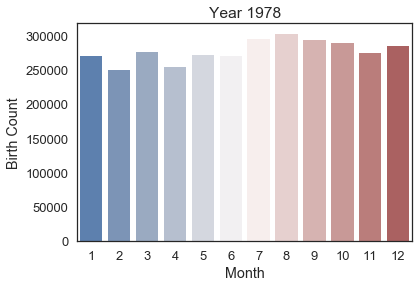

In [69]:
# Data Manipulation
Month_Birth = pd.DataFrame(DF.groupby('Month')['Count'].sum()) # Make it into a dataframe
Month_Birth.reset_index(level=0, inplace=True)                 # Make the row index into a column

# Plot
sns.barplot(x=Month_Birth['Month'], y=Month_Birth['Count'], palette="vlag")
plt.ylabel("Birth Count")
plt.title("Year 1978")
plt.show()

####  Visualization of Birth by Month

C:\Users\WeiKuang\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


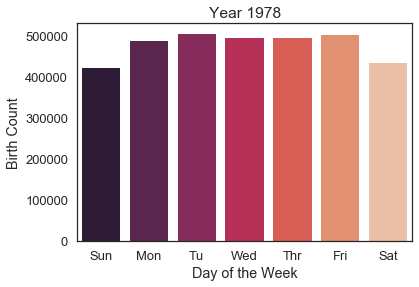

In [77]:
# Data Manipulation
DayWeek_Birth = pd.DataFrame(DF.groupby('Weekday')['Count'].sum()) # Make it into a dataframe
DayWeek_Birth.reset_index(level=0, inplace=True)                 # Make the row index into a column

# Plot
sns.barplot(x=['Sun','Mon', 'Tu', 'Wed','Thr','Fri','Sat'], y=DayWeek_Birth['Count'], palette='rocket')
plt.ylabel("Birth Count")
plt.xlabel("Day of the Week")
plt.title("Year 1978")
plt.show()